<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

# Caos: Primera parte

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción  a largo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

La razón es que $f(x) = rx(1-x)$ con el parámetro $0\leq r\leq 4$ es una función cuadrática negativa que va de cero a uno. 
Se grafica para ejemplificar

In [81]:
# import las librerias que me permiten trabajar con sympy y las operaciones
import sympy as sym
from sympy import *
x = sym.symbols('x')
r = sym.symbols('r')

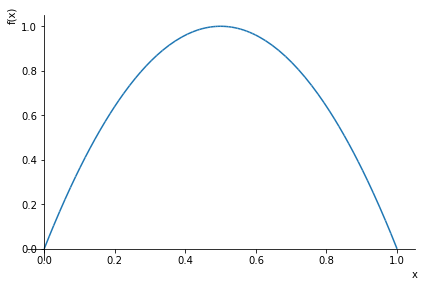

In [86]:
r=4
plot(r*x*(1-x),(x,0,1))

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [3]:
# hecho en clase
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [4]:
# definimos variables
x,r,x_0= symbols('x r x_0')
f = Function('f')

In [5]:
Eq(x,f(x))

Eq(x, f(x))

In [6]:
Eq(x, logistic_map(x,2))

Eq(x, 2*x*(1 - x))

In [7]:
solve(Eq(x, logistic_map(x,2)))

[0, 1/2]

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [8]:
# hecho en clase
abs(diff(logistic_map(x,r),x))

Abs(-r*x + r*(1 - x))

In [9]:
from sympy.plotting import plot

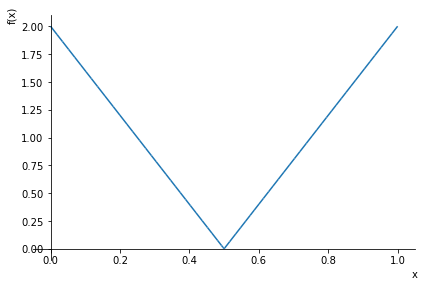

In [10]:
plot(abs(diff(logistic_map(x,2),x)),(x,0,1))

In [11]:
diff(logistic_map(x,r),x).replace(x,1-1/r)

-r*(1 - 1/r) + 1

In [12]:
solve(abs(diff(logistic_map(x,r),x).replace(x,1-1/r))<1)

(1 < r) & (r < 3)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [13]:
# hecho en clase
def iterar(g, x0, N, r):
    if N==0:
        return x0
    if N>1:
        return g(iterar(g,x0,N-1,r), r)
    else:
        return g(x0,r)

In [14]:
x = iterar(logistic_map,0.35,100,2.8)
x

0.6428571428586157

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [15]:
# función para agrupar y mostrar los valores que toma la variable x en las iteraciones
def iterarLista(g, x0, N, mu):
    return [iterar(g,x0,i,mu) for i in range(N)]

In [16]:
iterarLista(logistic_map,1/4,100,3)

[0.25,
 0.5625,
 0.73828125,
 0.5796661376953125,
 0.7309599195141345,
 0.5899725467340735,
 0.7257148225025549,
 0.5971584567079203,
 0.7216807028704055,
 0.6025729979246489,
 0.7184363402902498,
 0.6068566957218066,
 0.7157449397382518,
 0.6103623629320143,
 0.713460446544187,
 0.6133039132834688,
 0.7114866697039566,
 0.6158201656125887,
 0.7097570677124175,
 0.6180059176340649,
 0.7082238102100269,
 0.6199285345848561,
 0.706851439776987,
 0.6216374455865626,
 0.7056129954935281,
 0.6231698882525353,
 0.7044875358835738,
 0.6245545430047923,
 0.7034584974506021,
 0.6258139194454301,
 0.7025125730213365,
 0.6269659733048335,
 0.701638924868269,
 0.6280252319339057,
 0.7008286199648089,
 0.6290035962090911,
 0.7000742164953654,
 0.629910923681297,
 0.6993694557248167,
 0.630755460371971,
 0.6987090287487417,
 0.6315441656811952,
 0.6980883974257147,
 0.6322829604159362,
 0.6975036551507876,
 0.6329769186062363,
 0.6969514173539713,
 0.6336304176067855,
 0.6964287344707083,
 0.6342472

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [17]:
it1= iterarLista(logistic_map,1/2,100,.8)
it1

[0.5,
 0.2,
 0.12800000000000003,
 0.08929280000000003,
 0.06505567669452801,
 0.048658748499476046,
 0.03703285975515263,
 0.02852914164280626,
 0.02217218377594477,
 0.017344462434040402,
 0.013634905645531652,
 0.010759195994855282,
 0.008514748557119659,
 0.00675379809130295,
 0.00536654744211589,
 0.004270198088533929,
 0.003401570797454888,
 0.0027120000908518326,
 0.002163716117087242,
 0.001727227559721519,
 0.0013793953957427659,
 0.0011019941312679757,
 0.0008806237921621013,
 0.0007038786351190235,
 0.0005627065519888372,
 0.0004499119306601488,
 0.0003597676079318388,
 0.0002877105401600974,
 0.00023010221024414258,
 0.0001840394105735867,
 0.00014720443205515398,
 0.00011774621032826985,
 9.418587692657855e-05,
 7.53416047577329e-05,
 6.026874272026035e-05,
 4.821208831912901e-05,
 3.8567811130935136e-05,
 3.0853058923903765e-05,
 2.4681685610127044e-05,
 1.9744861139617994e-05,
 1.5795577024061257e-05,
 1.2636262019046189e-05,
 1.01088818751427e-05,
 8.087023748519948e-06

In [18]:
it2= iterarLista(logistic_map,1/2,100,1.2)
it2

[0.5,
 0.3,
 0.252,
 0.2261952,
 0.21003711779635198,
 0.19910583233298398,
 0.1913552398367684,
 0.18568609442853748,
 0.18144812251729647,
 0.17822964162269356,
 0.1757566037636877,
 0.17383946399657013,
 0.1723431657047464,
 0.17116919872753528,
 0.1702443649614106,
 0.16951346539235596,
 0.1689343805316366,
 0.16847466672723455,
 0.16810914407805816,
 0.16781815170648098,
 0.16758626359716183,
 0.1674013294208453,
 0.1672537491947747,
 0.1671359190900793,
 0.1670418043679925,
 0.16696660795377338,
 0.16690651173862117,
 0.16685847369344003,
 0.16682006814016276,
 0.16678935960704905,
 0.1667648029547034,
 0.1667451641402188,
 0.16672945725128435,
 0.1667168944031718,
 0.16670684582848014,
 0.16669880805887938,
 0.16669237854075392,
 0.1666872353726159,
 0.16668312112374006,
 0.16667982990742639,
 0.16667719705134937,
 0.16667509084134602,
 0.16667340592125007,
 0.16667205801583235,
 0.16667097971111924,
 0.1666701170799059,
 0.16666942698297163,
 0.16666887491056742,
 0.16666843325

In [19]:
it3= iterarLista(logistic_map,1/2,100,2.8)
it3

[0.5,
 0.7,
 0.588,
 0.6783168,
 0.6109687327457278,
 0.6655206329878602,
 0.6232881761548346,
 0.6574400717371606,
 0.6305953466719136,
 0.6522455951973996,
 0.6350995804803706,
 0.6488946893912779,
 0.6379250401190096,
 0.6467347132628748,
 0.6397129869862533,
 0.6453447875486611,
 0.6408496996508167,
 0.6444518139031691,
 0.6415742856882357,
 0.6438788205692243,
 0.6420368779765051,
 0.6435114708251246,
 0.6423324816765063,
 0.6432761010474596,
 0.6425214848321867,
 0.6431253538114405,
 0.6426423726697799,
 0.6430288298535798,
 0.642719710726004,
 0.6429670356768,
 0.642769194787408,
 0.6429274796553144,
 0.6428008595662631,
 0.6429021606199818,
 0.6428211229723945,
 0.6428859551321316,
 0.6428340907127397,
 0.6428755830847416,
 0.6428423897229463,
 0.6428689447550662,
 0.6428477009488067,
 0.6428646961341927,
 0.6428511000757573,
 0.6428619769800087,
 0.6428532754934176,
 0.6428602367062448,
 0.6428546677510599,
 0.6428591229248559,
 0.6428555587919944,
 0.6428584101022357,
 0.6428

In [20]:
it4= iterarLista(logistic_map,1/4,100,3.2)
it4

[0.25,
 0.6000000000000001,
 0.768,
 0.5701632,
 0.7842468011704321,
 0.5414520192780059,
 0.7945015363128827,
 0.522460304349926,
 0.7983857111312278,
 0.5150910956566768,
 0.7992712282620194,
 0.5133975421905355,
 0.799425618762409,
 0.5131017562519952,
 0.7994507007459626,
 0.5130536890328063,
 0.7994547238484313,
 0.5130459787675512,
 0.7994553678015891,
 0.5130447446234081,
 0.7994554708406723,
 0.5130445471474921,
 0.7994554873270939,
 0.5130445155510166,
 0.7994554899649258,
 0.5130445104955721,
 0.7994554903869789,
 0.5130445096867007,
 0.7994554904545075,
 0.5130445095572813,
 0.7994554904653121,
 0.5130445095365741,
 0.7994554904670408,
 0.513044509533261,
 0.7994554904673173,
 0.513044509532731,
 0.7994554904673616,
 0.5130445095326461,
 0.7994554904673686,
 0.5130445095326327,
 0.7994554904673699,
 0.5130445095326304,
 0.79945549046737,
 0.5130445095326301,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [21]:
from ipywidgets import interact, fixed, widgets
import matplotlib.pyplot as plt
import numpy as np

In [22]:
N=27
a=np.array([n for n in range(1,N+1)])
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

interactive(children=(FloatSlider(value=0.35, description='x_0', max=1.0499999999999998, min=-0.35), IntSlider…

<function __main__.grafica(x_0, N, r)>

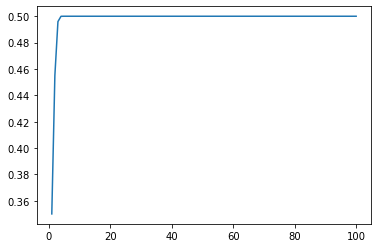

In [23]:
def grafica(x_0,N,r):
    return plt.plot(np.array([n for n in range(1,N+1)]), iterarLista(logistic_map,x_0,N,r))

interact(grafica, x_0=.35, N=100, r=(0,4))

notamos que entre $N$ es mayor más precisa es la gráfica y ubicamos mejor los periodos que se llegan a forma, para cambios con $x_0$ la forma de las gráficas cambia muchísimo, incluso toma valores muy cercanos a $0$; y con r como parámetro se puede observar los periodos que se forman en el punto fijo

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

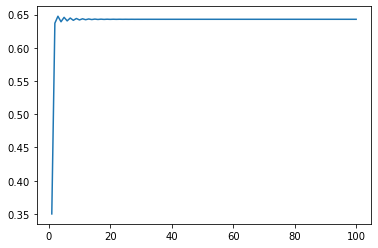

In [24]:
grafica(.35,100,2.8)

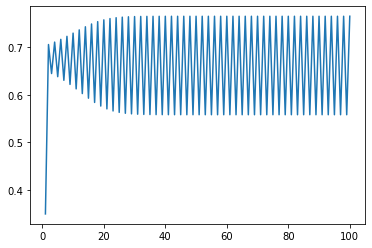

In [25]:
grafica(.35,100,3.1)

podemos observar lo dicho en el ejercicio anterior, que con r en un determinado valor hay periodos que se marcan y otros que solo se van a un punto fijo en casi todas las iteraciones

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

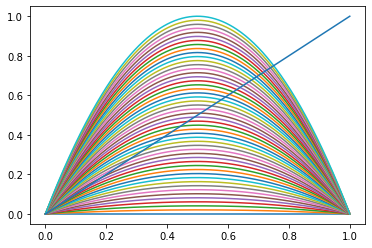

In [100]:
# graficamos para diferentes valores de r entre 0 y 4 comparando con recta 
x1 = np.linspace(0,1,500)
y1 = np.linspace(0,4,500)
for i in np.linspace(0,4,50):
    f1 = logistic_map(x1,i)
    plt.plot(x1,f1)
plt.plot(x1,x1)

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

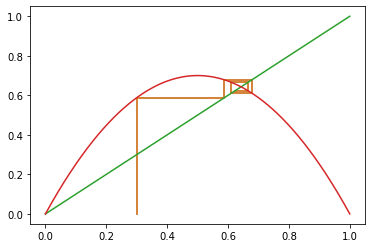

In [124]:
r = 2.8
xi = .2
px, py = np.empty((2,10+1,2))
px[0], py[0] = .3, 0
for n in range(1, 10, 2):
        px[n] = px[n-1]
        py[n] = logistic_map(px[n-1],r)
        px[n+1] = py[n]
        py[n+1] = py[n]
plt.plot(px,py)
plt.plot(x1,x1)
plt.plot(x1,logistic_map(x1,r))

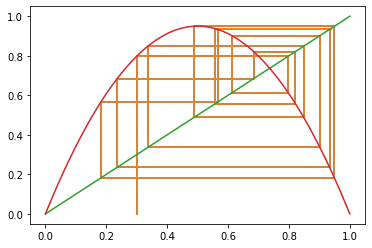

In [146]:
# se estudió la teoría de https://en.wikipedia.org/wiki/Cobweb_plot
# se implementan variables y valores iterativos para detectar x_0,f(x_0),...
r = 3.8
xi = .2
it_rec=30
px, py = np.empty((2,it_rec+1,2))
px[0], py[0] = .3, 0
for n in range(1, it_rec, 2):
        px[n] = px[n-1]
        py[n] = logistic_map(px[n-1],r)
        px[n+1] = py[n]
        py[n+1] = py[n]
plt.plot(px,py)
plt.plot(x1,x1)
plt.plot(x1,logistic_map(x1,r))

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [26]:
import math
from PIL import Image
imgx = 1000
imgy = 1000
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion2.png", "PNG")

<img src="bifurcacion2.png"/>

In [27]:
# con funciones hechas en ejercicio anterior
import math
from PIL import Image
imgx = 300
imgy = 300
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 500

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = logistic_map(x,r)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion3.png", "PNG")

<img src="bifurcacion3.png"/>

In [28]:
# se intentó meter el parámetro r con lo que sale en la función de la imagen anterior pero no
# resultó
def iterarLista2(g, x0, N, im):
    for i in range(N):
        mu = (1 + (3*float(i)) / (im - 1)) 
    return [iterar(g,x0,i,mu) for i in range(N)]
iterarLista2(logistic_map,1/2,100,1000)

[0.5,
 0.32432432432432434,
 0.28428720904980953,
 0.26395847587521654,
 0.2520446255855342,
 0.24456406352300378,
 0.23967889602956102,
 0.23641027826284788,
 0.23418870304155337,
 0.23266294626067266,
 0.23160765366223915,
 0.2308742249867824,
 0.230362789911613,
 0.23000532964637974,
 0.22975508494785718,
 0.22957970061205638,
 0.22945668542132103,
 0.229370354512582,
 0.22930974484327066,
 0.2292671815306181,
 0.22923728562632395,
 0.22921628433080968,
 0.22920152993952922,
 0.22919116360593508,
 0.2291838799535904,
 0.2291787621055248,
 0.22917516597444854,
 0.22917263905950164,
 0.22917086343697948,
 0.229169615725659,
 0.22916873896710852,
 0.22916812287221683,
 0.2291676899434915,
 0.22916738572469872,
 0.22916717195001843,
 0.22916702173031236,
 0.2291669161706866,
 0.22916684199373505,
 0.2291667898694316,
 0.22916675324156288,
 0.22916672750307052,
 0.22916670941656725,
 0.22916669670713496,
 0.22916668777618376,
 0.2291666815003808,
 0.22916667709035743,
 0.2291666739914222

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

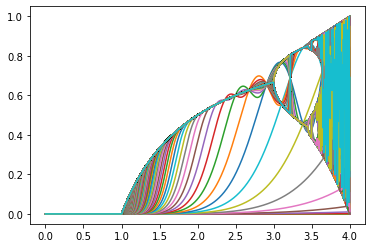

In [38]:
# implementamos codigo de grafica de bifurcción estudiado en la pagina anterior y 
# dejamos porqué se pide que sea mayor a cierto valor
ner=1000
r1 = np.linspace(0,4,ner)
r2 = 1e-5 * np.ones(ner)
for n in range(ner):
    r2 = logistic_map(r2,r1)
    plt.plot(r1,r2)

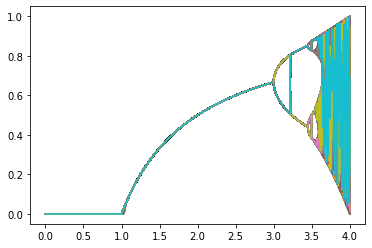

In [152]:
ner=1000
r1 = np.linspace(0,4,ner)
r2 = 1e-5 * np.ones(ner)
for n in range(ner):
    r2 = logistic_map(r2,r1)
    if n >= 200:
        plt.plot(r1,r2)

<div class="alert alert-info">
    
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

los compañeros de clase me recomendaron visitar la página:
    https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

In [262]:
def logis2(x,u):
    return 1-u*x**2

In [270]:
u, x = sym.symbols('u x')

In [268]:
# suponemos u = 2 como ejercicios anteriores
u = 2
solve(Eq(logis2(x,u),x))

[-1, 1/2]

In [266]:
u = u
solve(Eq(logis2(x,u),x),x)

[(sqrt(4*u + 1) - 1)/(2*u), -(sqrt(4*u + 1) + 1)/(2*u)]

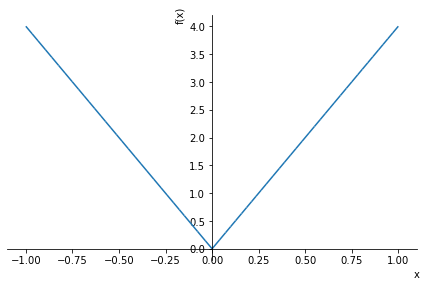

In [269]:
plot(abs(diff(logis2(x,u),x)),(x,-1,1))

In [271]:
abs(diff(logis2(x,u),x).replace(x, (sqrt(4*u + 1) - 1)/(2*u)))

Abs(sqrt(4*u + 1) - 1)

In [272]:
abs(diff(logis2(x,u),x).replace(x, -(sqrt(4*u + 1) - 1)/(2*u)))

Abs(sqrt(4*u + 1) - 1)

por el teorema buscamos el valor menor a 1 en valor absoluto de su derivada para valores estables

In [273]:
solve(abs(diff(logis2(x,u),x).replace(x, -(sqrt(4*u + 1) - 1)/(2*u)))<1)

(-1/4 < u) & (u < 3/4)

In [292]:
# dejamos un ejemplo de los valores pedidos para r en el ejercicio anterior
# notar que si u obtiene valores de 2.8 y 3.2 se sale del rango por ser inestable

it23= iterarLista(logis2,1/2,100,2.8)
it23
#it24= iterarLista(logis2,1/2,15,3.2)
#it24

OverflowError: (34, 'Numerical result out of range')

In [284]:
it22= iterarLista(logis2,1/2,100,1.2)
it22

[0.5,
 0.7,
 0.41200000000000014,
 0.7963071999999999,
 0.23907381187379229,
 0.9314124549713615,
 -0.041034993530934205,
 0.9979793551670995,
 -0.19515535200768763,
 0.9542972662993067,
 -0.09281992695959573,
 0.9896613533910584,
 -0.17531551327498573,
 0.963117364966154,
 -0.11311407043921728,
 0.9846462484824061,
 -0.16343388158057137,
 0.9679472396218093,
 -0.12430623042977618,
 0.9814575532916072,
 -0.15591071469577766,
 0.9708302188516622,
 -0.13101357660267943,
 0.9794025312949286,
 -0.15107518196829628,
 0.9726115472718954,
 -0.13516786626395638,
 0.978075577515579,
 -0.1479582023989201,
 0.9737300444114563,
 -0.13778023926744387,
 0.9772199268008871,
 -0.14595054240407745,
 0.9744381270063467,
 -0.13943559603636446,
 0.9766692574695806,
 -0.1446594061834181,
 0.9748883874431931,
 -0.14048884156590713,
 0.9763154624745634,
 -0.14383025872030464,
 0.9751754280117403,
 -0.14116053847745702,
 0.9760884428521053,
 -0.143298377923337,
 0.9753586898614486,
 -0.14158948866588972,
 0.9

In [283]:
it21 = iterarLista(logis2,1/2,100,.8)
it21

[0.5,
 0.8,
 0.4879999999999999,
 0.8094848000000001,
 0.4757874868551678,
 0.8189010138816348,
 0.46352090357090436,
 0.8281186975622499,
 0.4513755381982423,
 0.8370080988129976,
 0.4395339540171609,
 0.8454479226128322,
 0.42817424811971716,
 0.853333450597692,
 0.4174576176728292,
 0.8605833099575407,
 0.40751709329801866,
 0.8671438549359471,
 0.39844922787745995,
 0.8729905702430848,
 0.3903099714133229,
 0.8781265009722649,
 0.38311507863216554,
 0.8825782692197357,
 0.37684447896087647,
 0.8863905909413644,
 0.3714493762324951,
 0.8896202887171922,
 0.3668605935221916,
 0.8923306439364362,
 0.36299681751358803,
 0.8945866483800055,
 0.3597717828321828,
 0.8964514114222022,
 0.3570998935673132,
 0.8979837328113709,
 0.3549001724849251,
 0.8992366940561363,
 0.35309869445039255,
 0.9002570495819426,
 0.3516297957424125,
 0.9010851893969194,
 0.3504363851596143,
 0.9017554719650099,
 0.34946965502492966,
 0.9022967681734053,
 0.3486884337150624,
 0.9027331009546692,
 0.34805835875

interactive(children=(FloatSlider(value=0.35, description='x_0', max=1.0499999999999998, min=-0.35), IntSlider…

<function __main__.grafica(x_0, N, r)>

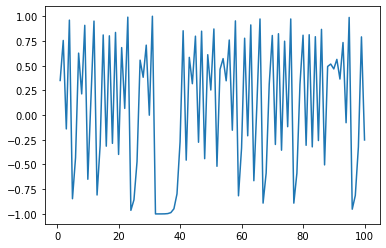

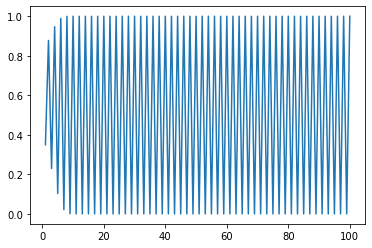

In [293]:
def grafica(x_0,N,r):
    return plt.plot(np.array([n for n in range(1,N+1)]), iterarLista(logis2,x_0,N,r))

interact(grafica, x_0=.35, N=100, r=(0,4))

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 1.3$ y (b) para $x_0 = 0.35$ en $r=-.25$. ¿Porqué escogí estos valores?
</div>

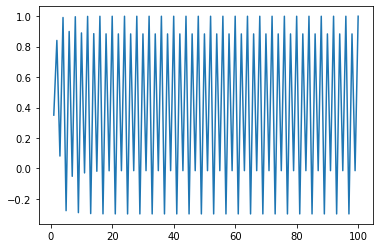

In [296]:
grafica(.35,100,1.3)

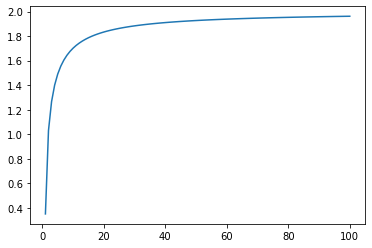

In [303]:
grafica(.35,100,-.25)

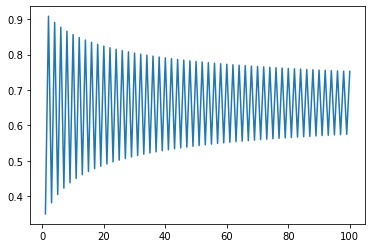

In [309]:
grafica(.35,100,.75)

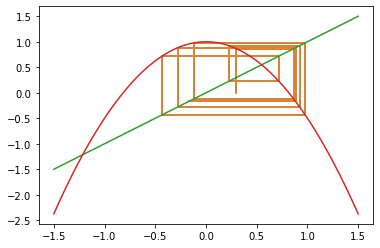

In [317]:
r = 1.5
xi = .2
x1= np.linspace(-1.5,1.5,500)
px, py = np.empty((2,20+1,2))
px[0], py[0] = .3, 0
for n in range(1, 20, 2):
        px[n] = px[n-1]
        py[n] = logis2(px[n-1],r)
        px[n+1] = py[n]
        py[n+1] = py[n]
plt.plot(px,py)
plt.plot(x1,x1)
plt.plot(x1,logis2(x1,r))

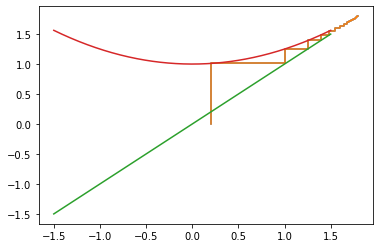

In [320]:
# se estudió la teoría de https://en.wikipedia.org/wiki/Cobweb_plot
# se implementan variables y valores iterativos para detectar x_0,f(x_0),...
r = -.25
xi = .2
it_rec=30
px, py = np.empty((2,it_rec+1,2))
px[0], py[0] = xi, 0
for n in range(1, it_rec, 2):
        px[n] = px[n-1]
        py[n] = logis2(px[n-1],r)
        px[n+1] = py[n]
        py[n+1] = py[n]
plt.plot(px,py)
plt.plot(x1,x1)
plt.plot(x1,logis2(x1,r))

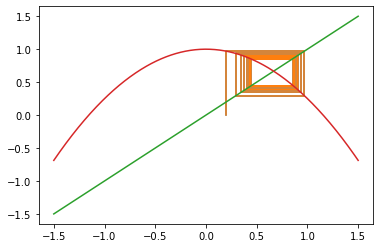

In [323]:
# se estudió la teoría de https://en.wikipedia.org/wiki/Cobweb_plot
# se implementan variables y valores iterativos para detectar x_0,f(x_0),...
r = .75
xi = .2
it_rec=30
px, py = np.empty((2,it_rec+1,2))
px[0], py[0] = xi, 0
for n in range(1, it_rec, 2):
        px[n] = px[n-1]
        py[n] = logis2(px[n-1],r)
        px[n+1] = py[n]
        py[n+1] = py[n]
plt.plot(px,py)
plt.plot(x1,x1)
plt.plot(x1,logis2(x1,r))

/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in multiply
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipy

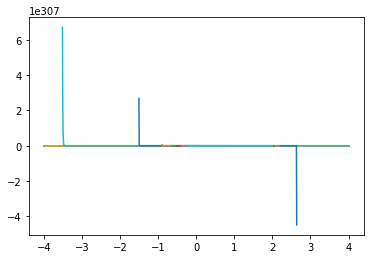

In [332]:
# implementamos codigo de grafica de bifurcción estudiado en la pagina anterior y 
# dejamos porqué se pide que sea mayor a cierto valor
ner=1000
r1 = np.linspace(-4,4,ner)
r2 = 1e-5 * np.ones(ner)
for n in range(ner):
    r2 = logis2(r2,r1)
    plt.plot(r1,r2)

/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in square
  return 1-u*x**2
/tmp/ipykernel_218/65257639.py:2: RuntimeWarning: overflow encountered in multiply
  return 1-u*x**2


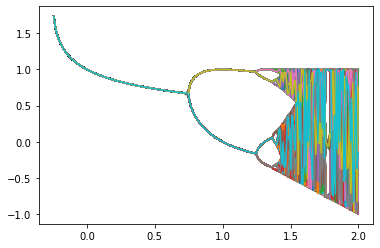

In [337]:
# implementamos codigo de grafica de bifurcción estudiado en la pagina anterior y 
# dejamos porqué se pide que sea mayor a cierto valor
ner=1000
r1 = np.linspace(-4,4,ner)
r2 = 1e-5 * np.ones(ner)
for n in range(ner):
    r2 = logis2(r2,r1)
    if n>= 200:
        plt.plot(r1,r2)